In [3]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [32]:
SCHEMES = ["rcu", "rlu"]
UPDATE_RATIOS = [0.02, 0.2, 0.4]
THREADS = [1, 2, 4, 6, 8, 10, 12, 14, 16]

In [21]:
def read_data(path):
    data = pd.read_csv(path)
    res = {k: {kp: None for kp in UPDATE_RATIOS} for k in SCHEMES}
    
    for scheme in SCHEMES:
        for ratio in UPDATE_RATIOS:
            res[scheme][ratio] = data[(data.scheme == scheme) & (data.update_ratio == ratio)].sort_values(by='threads').ops_per_us.values.copy()
            
    return res

In [22]:
data = read_data("data.csv")

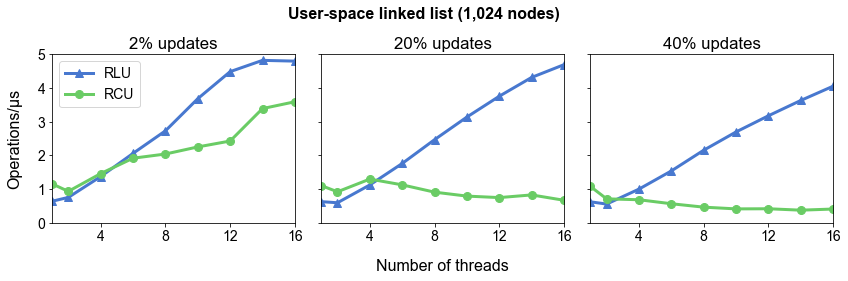

In [161]:
#ax[0] = plt.subplot(1, 3, 1, figsize=(6,6))
#ax[1] = plt.subplot(1, 3, 2, sharey=ax[0])
#ax[2] = plt.subplot(1, 3, 3, sharey=ax[0])

plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = 14

with plt.style.context("seaborn-muted"):
    fig, ax = plt.subplots(1, 3, sharey='all', sharex=True, figsize=(12, 4), squeeze=True)
    
    for i, ratio in enumerate(UPDATE_RATIOS):
        ax[i].plot(THREADS, data['rlu'][ratio], '-^', label='RLU', linewidth=3, markersize=8)
        ax[i].plot(THREADS, data['rcu'][ratio], '-o', label='RCU', linewidth=3, markersize=8)
        ax[i].set_title(f'{ratio * 100:.0f}% updates')
        ax[i].set_xticks(range(4, 17, 4))
        ax[i].set_xlim(min(THREADS), max(THREADS))
        ax[i].set_ylim(0, 5)

        if i == 0:
            ax[i].set_ylabel('Operations/\u00b5s', labelpad=15, fontsize=16)
            ax[i].legend()
        elif i == 1:
            ax[i].set_xlabel('Number of threads', labelpad=15, fontsize=16)
            
    fig.suptitle('User-space linked list (1,024 nodes)', fontsize=16, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig("output.pdf")
